In [1]:
import os 
os.getcwd()

'C:\\Windows\\system32\\1033\\MALARIA EDA'

In [2]:
#Getting interaction between the opearting system and project file on the pc to jupyter lab
os.chdir('C:\\Windows\\system32\\1033\\MALARIA EDA')

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [5]:
#Returning a name of pathnames (Files) matching provided string
import glob
glob.glob('C:\\Windows\\system32\\1033\\MALARIA EDA/Malaria data/Malaria data 2022.csv')

['C:\\Windows\\system32\\1033\\MALARIA EDA/Malaria data/Malaria data 2022.csv']

In [6]:
all_files = glob.glob('C:\\Windows\\system32\\1033\\MALARIA EDA/Malaria data/Malaria data 2022.csv')
dfs = []
for file in all_files:
    df = pd.read_csv(file)

## Removing Unwanted Columns


In [7]:
#Dropping Some Columns
df.drop(columns = ["POPULATION IN 2014", "POPULATION IN 2024", 
                           "ANNUAL GROWTH RATE[Pt​=P0​×(1+r)t]","ANNUAL GROWTH RATE[Pt​=P0​×(1+r)t]"], inplace = True)

## Calculation of Key Metrics

- Incidence Rate

In [8]:
#Convert Total Population to Numeric 
df['TOTAL POPULATION'] = pd.to_numeric(df['TOTAL POPULATION'], errors='coerce')

In [9]:
df['Incidence_Rate'] = (

    df['TOTAL CASES CONFIRMED(B/S & RDT)'] / df['TOTAL POPULATION']
) * 1000

### Handling Missing Values 

#### 1. Dealing with Lat-Lot Columns(Missing data) 

In [ ]:
# Convert to numeric safely
df['CORDINATES (LATITUDE ° N)'] = pd.to_numeric(df['CORDINATES (LATITUDE ° N)'], errors='coerce')
df['CORDINATES (LONGITUDE ° E)'] = pd.to_numeric(df['CORDINATES (LONGITUDE ° E)'], errors='coerce')

# Fill missing coords within same District (if available)
df['CORDINATES (LATITUDE ° N)'] = (
    df.groupby('District')['CORDINATES (LATITUDE ° N)']
    .transform(lambda x: x.fillna(x.median()))
)
df['CORDINATES (LONGITUDE ° E)'] = (
    df.groupby('District')['CORDINATES (LONGITUDE ° E)']
    .transform(lambda x: x.fillna(x.median()))
)

# If still missing (district has no coords at all) → leave NaN


#### 2. Fill in the remaining Missing Values

In [11]:
#Replace wit a Zero
df = df.fillna(0)

In [12]:
#Counting Missing Values per column
missing_report = df.isna().sum()
#Show all colums with missing Data 
missing_report = missing_report[missing_report> 0].sort_values(ascending=False)
print(missing_report)

Series([], dtype: int64)


## Advanced Anlaysis (TIME SERIES ANALYSIS)

- Implementing Spatial Autocorrelation analysis to determine if malaria distribution is clustered, or dispersed

### Calculation of Global Moran Index

In [13]:
import libpysal as lps
from esda.moran import Moran

### Spatial Visualization

In [ ]:
pip install splot

In [15]:
ug_map = r"D:\Data Analyst\PROJECTS DATA SCIENCE\MALARIA CASES\Uganda_Districts-2020---136-wgs84.shp"

In [16]:
import geopandas as gpd
shp_f = gpd.read_file(ug_map)

In [17]:
shp_f.head()

,dname2019,d,total2020,ttotal2020,2010,2016,2017,2018,2020,geometry
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993..."
1,BUTEBO,Butebo,"121,200",121200.0,PALLISA,BUTEBO,BUTEBO,BUTEBO,BUTEBO,"POLYGON ((33.87314 1.22742, 33.87306 1.22897, ..."
2,ALEBTONG,Alebtong,"266,100",266100.0,ALEBTONG,ALEBTONG,ALEBTONG,ALEBTONG,ALEBTONG,"POLYGON ((33.4429 2.36391, 33.44264 2.36336, 3..."
3,TORORO,Tororo,"597,500",597500.0,TORORO,TORORO,TORORO,TORORO,TORORO,"POLYGON ((33.97873 0.578, 33.97864 0.57808, 33..."
4,MOROTO,Moroto,"118,500",118500.0,MOROTO,MOROTO,MOROTO,MOROTO,MOROTO,"POLYGON ((34.83133 2.16438, 34.83133 2.16438, ..."


<Axes: >

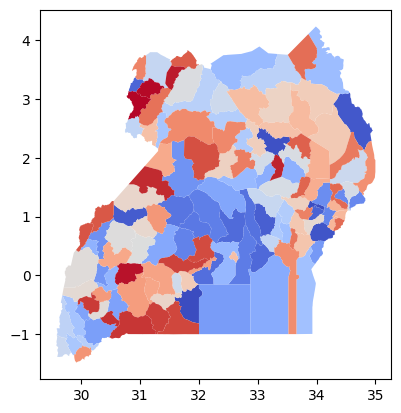

In [18]:
shp_f.plot(cmap = 'coolwarm')

### Merging Shape File Districts data with Our data 

In [19]:
#Stripping white Spaces From the Columns
df.columns = df.columns.str.strip()

In [20]:
import geopandas as gpd
import pandas as pd
import re 
import unicodedata



# Optional: convert to GeoDataFrame for mapping
gdf = gpd.GeoDataFrame(
   df,
    geometry=gpd.points_from_xy(df['CORDINATES (LONGITUDE ° E)'], df['CORDINATES (LATITUDE ° N)']),
    crs="EPSG:4326"
)


#Load Shape File 
shp_path = r"D:\Data Analyst\PROJECTS DATA SCIENCE\MALARIA CASES\Uganda_Districts-2020---136-wgs84.shp"
gdf = gpd.read_file(shp_path)

#inspect key columns and CRS
print(df.columns)
print(df.shape)
print(gdf.crs)

Index(['Region', 'District', '0-28 DAYS FEMALE', '0-28 DAYS MALE',
       '0-28 DAYS TOTAL', '10-19 YEARS FEMALE', '10-19 YEARS MALE',
       '10-19YRS TOTAL', '20+ YRS FEMALE', '20+ YRS MALE', '20+ YRS TOTAL',
       '5-9YRS FEMALE', '5-9YRS MALE', '5-9YRS TOTAL', '29 DAYS-4YRS FEMALE',
       '29DAYS - 4YRS MALE', '29 DAYS - 4YRS TOTAL',
       '0-28 DAYS (B/S & RDT) FEMALE', '0-28 DAYS (B/S & RDT) MALE',
       '0-28 DAYS  (B/S & RDT) TOTAL', '10-19 YRS (B/S & RDT) FEMALE',
       '10-19 YRS (B/S & RDT) MALE', '10-19 YRS  (B/S & RDT) TOTAL',
       '20+  (B/S &RDT) FEMALE', '20+ (B/S & RDT) MALE',
       '20 + (B/S & RDT) TOTAL', '29DAYS-4YRS (B/S & RDT) FEMALE',
       '29DAYS-4YRS (B/S & RDT) MALE', '29DAYS-4 YRS  (B/S & RDT) TOTAL',
       '5-9YRS (B/S & RDT) FEMALE', '5-9YRS (B/S & RDT) MALE',
       '5-9YRS (B/S & RDT) TOTAL', 'TOTAL CASES CONFIRMED(B/S & RDT)',
       '0-28 DAYS FEMALE CT', '0-28 DAYS MALE  CT', '0-28 DAYS TOTAL CT',
       '10-19 YRS FEMALE CT', '10-19 YRS MA

In [21]:
import pandas as pd
import numpy as np
import libpysal as lps
from esda.moran import Moran

# Column names
district_col = 'District'
cases_col = 'TOTAL CASES CONFIRMED(B/S & RDT)'
lat_col = 'CORDINATES (LATITUDE ° N)'
lon_col = 'CORDINATES (LONGITUDE ° E)'
pop_col = 'TOTAL POPULATION'

#  Filter only rows that represent districts (exclude regions)
district_only = df[
    df[district_col].str.contains(r'\bDistrict$', case=False, na=False)
].copy()

# Aggregate to ensure one row per district
district_data = district_only.groupby(district_col).agg({
    cases_col: 'sum',           # total confirmed cases per district
    lat_col: 'first',           # first valid latitude
    lon_col: 'first',           # first valid longitude
    pop_col: 'first'            # total population (or mean if varying by year)
}).reset_index()

# Clean coordinate columns and population values
district_data['Latitude'] = pd.to_numeric(df[lat_col], errors='coerce')
district_data['Longitude'] = pd.to_numeric(df[lon_col], errors='coerce')
district_data['TOTAL POPULATION'] = pd.to_numeric(df[pop_col], errors='coerce')

# Drop missing coordinate or population values
district_data = district_data.dropna(subset=['Latitude', 'Longitude', 'TOTAL POPULATION'])

# Compute incidence rate (cases per 1,000 people)
#district_data['Incidence_Rate'] = (district_data[cases_col] / district_data['TOTAL POPULATION']) * 1000

# Verify structure
print("✅ Cleaned spatial dataset (district-level):")
print(district_data.head())
print(f"\nTotal districts included: {len(district_data)}")



✅ Cleaned spatial dataset (district-level):
            District  TOTAL CASES CONFIRMED(B/S & RDT)  \
0      Abim District                             79976   
1  Adjumani District                            364724   
2     Agago District                            283803   
3  Alebtong District                            143523   
4  Amolatar District                            120580   

   CORDINATES (LATITUDE ° N)  CORDINATES (LONGITUDE ° E)  TOTAL POPULATION  \
0                     2.7067                     33.6595      1.360035e+05   
1                     3.2549                     31.7195      1.921797e+06   
2                     2.9251                      0.0000      1.360035e+05   
3                     2.2914                     33.2139      2.893905e+05   
4                     1.6054                     32.8084      2.713098e+05   

   Latitude  Longitude  
0    2.7067    33.6595  
1    0.0000     0.0000  
2    3.2549    31.7195  
3    2.9251     0.0000  
4    2.2914  

In [22]:
df.head()

,Region,District,0-28 DAYS FEMALE,0-28 DAYS MALE,0-28 DAYS TOTAL,10-19 YEARS FEMALE,10-19 YEARS MALE,10-19YRS TOTAL,20+ YRS FEMALE,20+ YRS MALE,...,GRAND TOTAL CASES,<5YRS FEMALES TOTAL,<5YRS MALE TOTAL,< 5YRS GRAND TOTAL,AREA(Km2),TOTAL POPULATION,POPULATION DENSITY(People per km2),CORDINATES (LATITUDE ° N),CORDINATES (LONGITUDE ° E),Incidence_Rate
0,Karamoja,Abim District,12,18,30,14866,8361,23227,15518,7577,...,81531,11764,10358,22122,2301.0,1.360035e+05,59.10624763,2.7067,33.6595,588.043795
1,Acholi,Acholi,528,487,1015,336742,203007,539749,324222,111643,...,1619797,187698,174691,362389,28522.0,1.921797e+06,67.37944658,0.0000,0.0000,809.165247
2,West Nile,Adjumani District,170,162,332,68105,51850,119955,75937,29015,...,382425,45744,42372,88116,2301.0,1.360035e+05,59.10624763,3.2549,31.7195,2681.725580
3,Acholi,Agago District,24,25,49,66729,39309,106038,63923,19430,...,287254,27161,25072,52233,3493.0,2.893905e+05,82.8486925,2.9251,0.0000,980.692237
4,Lango,Alebtong District,37,33,70,24525,11600,36125,32950,8406,...,143537,21124,19386,40510,1534.0,2.713098e+05,176.8642484,2.2914,33.2139,529.000510


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              161 non-null    object 
 1   District                            161 non-null    object 
 2   0-28 DAYS FEMALE                    161 non-null    int64  
 3   0-28 DAYS MALE                      161 non-null    int64  
 4   0-28 DAYS TOTAL                     161 non-null    int64  
 5   10-19 YEARS FEMALE                  161 non-null    int64  
 6   10-19 YEARS MALE                    161 non-null    int64  
 7   10-19YRS TOTAL                      161 non-null    int64  
 8   20+ YRS FEMALE                      161 non-null    int64  
 9   20+ YRS MALE                        161 non-null    int64  
 10  20+ YRS TOTAL                       161 non-null    int64  
 11  5-9YRS FEMALE                       161 non-n

### Filtering only valid districts and Leaving out regions that were present in our district column

In [26]:
#Keep only rows where our 'District' Column contains the word "district"
district_data_districts = df[
    df['District'].str.contains(r'\bDISTRICT\b', case=False, na=False)   
].copy()

# normalization function
def normalize_name(s):
    if pd.isna(s):
        return ""
    s = str(s).upper().strip()
    s = unicodedata.normalize("NFKD", s)
    s = re.sub(r"[^A-Z0-9\s\-]", "", s)
    s = re.sub(r"\b(DISTRICT|CITY|COUNTY|REGION|MUNICIPAL|MUNICIPALITY)\b", "", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

# create normalized name fields
shp_name_col = '2020'          # change if your shapefile uses a different column
gdf['NAME_NORM'] = gdf[shp_name_col].apply(normalize_name)
district_data_districts['DIST_NORM'] = district_data_districts['District'].apply(normalize_name)

### Perfoming Matching of the filtered Valid districts in our original data with the available districts in the shape File

In [27]:
# exact merge
gdf_merged = gdf.merge(
    district_data_districts,
    left_on='NAME_NORM',
    right_on='DIST_NORM',
    how='left',
    validate='one_to_many'   
)
#inspect unmatched shapefile rows and unmatched data rows
unmatched_shapefile = gdf_merged[gdf_merged['District'].isna()]
print("Unmatched shaefile districts:", len(unmatched_shapefile))
print(unmatched_shapefile[shp_name_col].tolist()[:50])


# Check data rows that did not match into shapefile (useful when has > shapefile records )
matched_names = set(gdf_merged['DIST_NORM'].dropna().unique())
only_in_data = sorted(set(district_data_districts['DIST_NORM'].unique()) - matched_names)
print("Data-only (did not find a shapefile match):", len(only_in_data))
print(only_in_data[:50])

Unmatched shaefile districts: 2
['SSEMBABULE', 'MADI OKOLLO']
Data-only (did not find a shapefile match): 2
['MADI-OKOLLO', 'SEMBABULE']


### Matching msmatched District Names ['SSEMBABULE', 'MADI OKOLLO']

In [28]:
# Inspect raw strings to be sure there are no invisible chars
print(gdf.loc[gdf['NAME_NORM'].str.contains('SSEMBABULE', na=False), 'NAME_NORM'].unique())
print(gdf.loc[gdf['NAME_NORM'].str.contains('MADI', na=False), 'NAME_NORM'].unique())
print(district_data_districts.loc[district_data_districts['DIST_NORM'].str.contains('MADI', na=False), 'DIST_NORM'].unique())

# Manual corrections dictionary
corrections = {
    "SSEMBABULE": "SEMBABULE",
    "MADI OKOLLO": "MADI-OKOLLO",   # if you prefer hyphenated form in your data
    "MADI-OKOLLO": "MADI OKOLLO"    # if you prefer space form in shapefile
}

# Apply corrections to the side you want to change. Example: fix shapefile NAME_NORM
gdf['NAME_NORM'] = gdf['NAME_NORM'].replace(corrections)

# Or, to fix your cleaned data instead, run:
# district_data_districts['DIST_NORM'] = district_data_districts['DIST_NORM'].replace(corrections)

# Re-run the merge using the normalized fields
gdf_merged = gdf.merge(
    district_data_districts,
    left_on='NAME_NORM',
    right_on='DIST_NORM',
    how='left',
    validate='one_to_many'
)

# Verify no unmatched rows remain for these cases
unmatched_shapefile = gdf_merged[gdf_merged['District'].isna()]
print("Unmatched shapefile districts:", len(unmatched_shapefile))
print(unmatched_shapefile[shp_name_col].tolist())

['SSEMBABULE']
['MADI OKOLLO']
['MADI-OKOLLO']
Unmatched shapefile districts: 0
[]


In [29]:
from libpysal.weights import Queen, KNN, W
# Option 1: Queen contiguity (shared borders)
w_queen = Queen.from_dataframe(gdf_merged)
print(f"Queen contiguity: {w_queen.n} units, {w_queen.nonzero} links")

# Option 2: K-nearest neighbors (for islands or non-contiguous areas)
w_knn = KNN.from_dataframe(gdf_merged, k=5)
print(f"KNN weights: {w_knn.n} units, {w_knn.nonzero} links")

# Check for islands (districts with no neighbors)

islands = [i for i, nbrs in w_queen.neighbors.items() if len(nbrs) == 0]
if islands:
    print(f"{len(islands)} islands found. Using KNN weights for these districts.")
    # Create a hybrid weights matrix
    w_hybrid = w_queen
    for island in islands:
        w_hybrid.neighbors[island] = w_knn.neighbors[island]
    w = w_hybrid
else:
    w = w_queen

w.transform = 'r'  # Row-standardize

C:\Users\User\AppData\Local\Temp\ipykernel_18504\2843879156.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_merged)


Queen contiguity: 136 units, 694 links
KNN weights: 136 units, 680 links
1 islands found. Using KNN weights for these districts.
('WARNING: ', 124, ' is an island (no neighbors)')


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 124.
  W.__init__(self, neighbors, ids=ids, **kw)


## LISA + G* workflow

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 124.
  W.__init__(self, neighbors, ids=ids, **kw)
C:\Users\User\AppData\Local\Temp\ipykernel_18504\1778837089.py:45: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  w_hybrid = W(neighbors_hybrid, ids=ids)


Islands (no contiguity neighbors): [124]
Number of connected components: 2
 Component 1: 134 units (example indices): [0, 1, 2, 3, 4, 5, 6, 7]
 Component 2: 2 units (example indices): [134, 135]

Global Moran I results
 I       : 0.45066802318588606
 z-score : 8.78792955548192
 p-value : 0.001

Significant LISA clusters: High-High (HH)=12, Low-Low (LL)=25, total significant=39


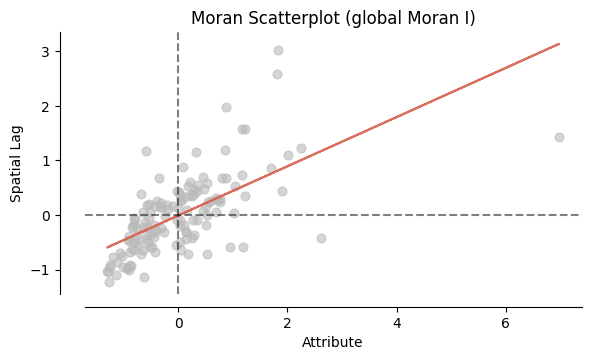

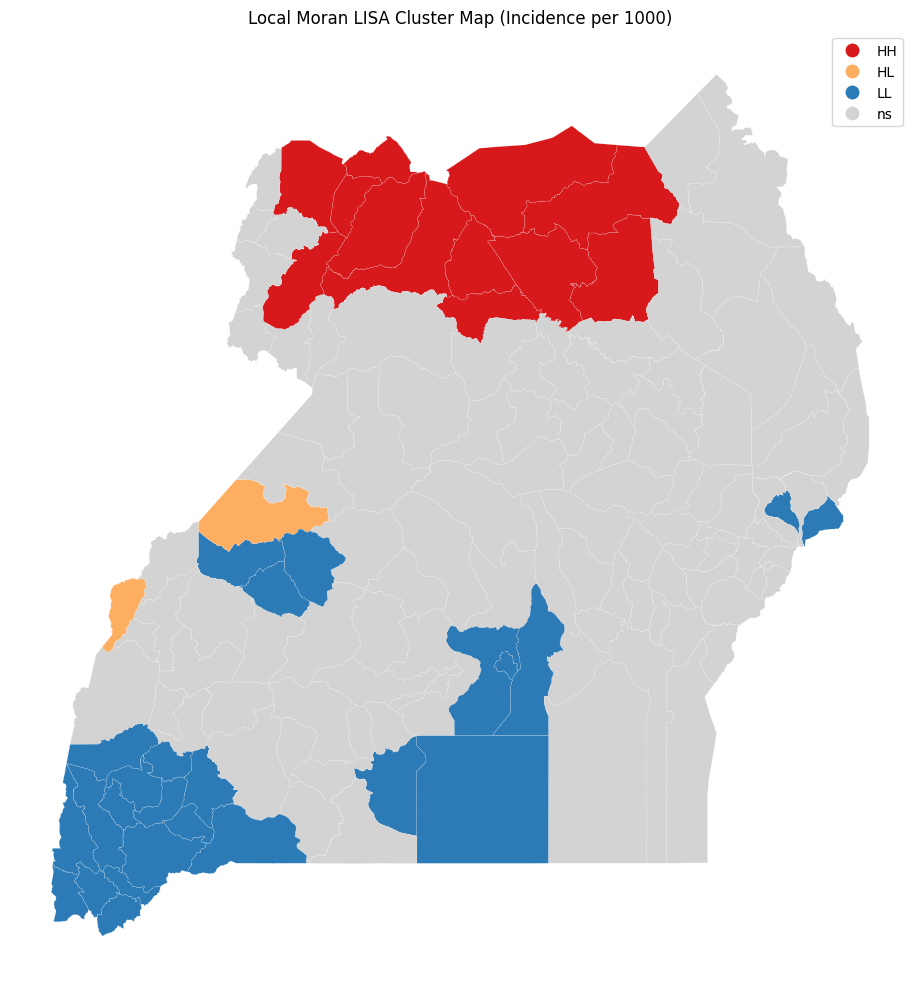

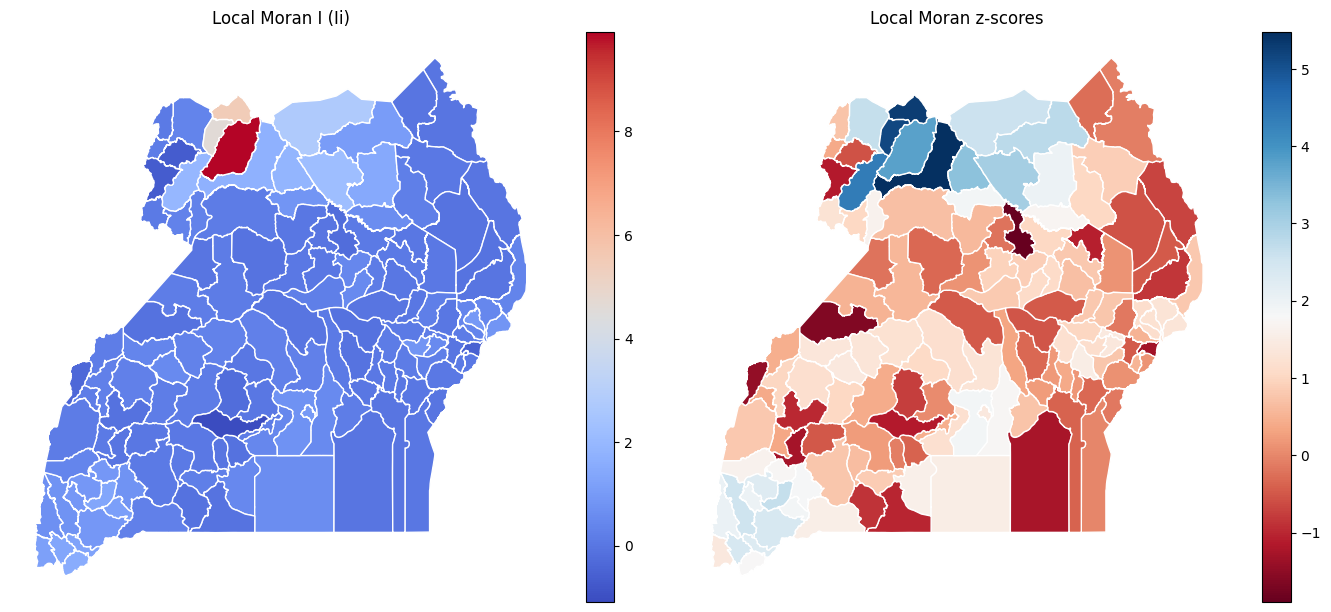

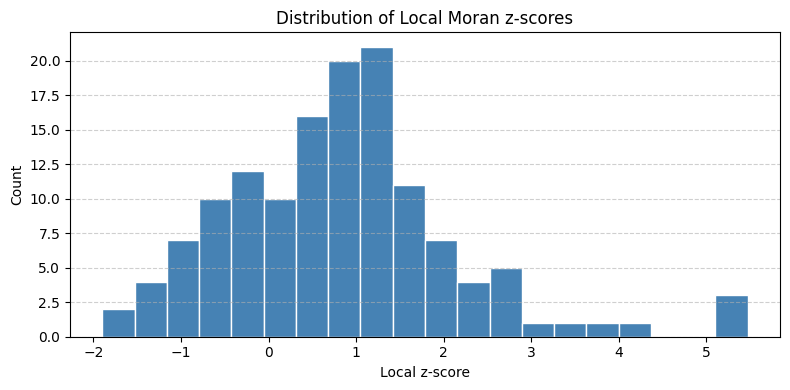

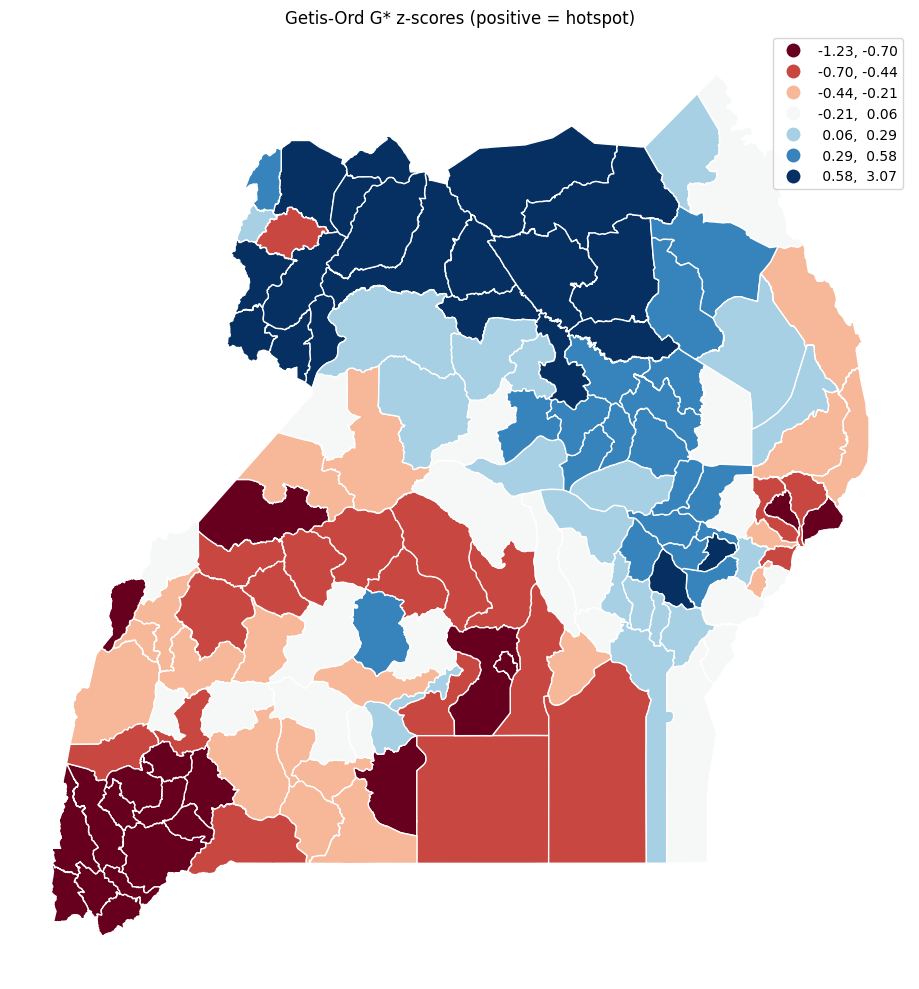

C:\Users\User\AppData\Local\Temp\ipykernel_18504\1778837089.py:150: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
C:\Users\User\AppData\Local\Temp\ipykernel_18504\1778837089.py:150: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


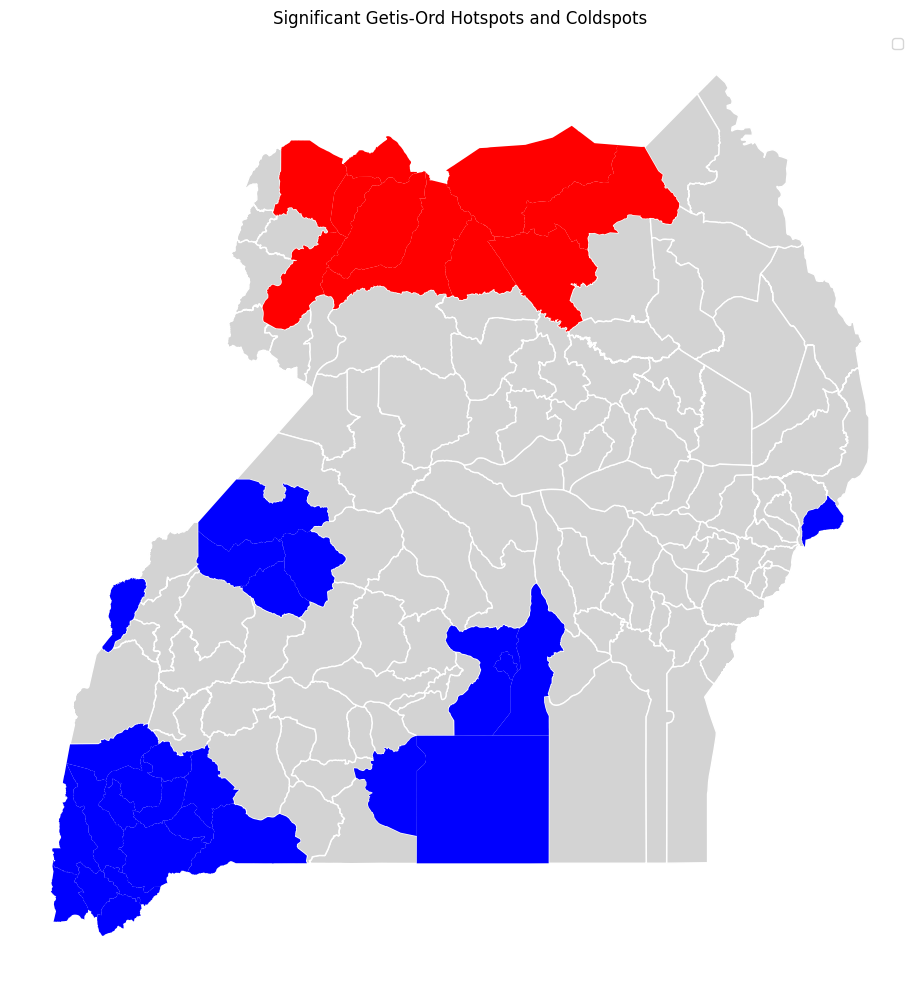

Exported: uganda_district_metrics_with_spatial_stats_2022.csv


In [30]:

# Full robust LISA + G* workflow (single runnable cell)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import splot.esda as splot_esda
from esda.moran import Moran, Moran_Local
from esda.getisord import G_Local
from libpysal.weights import Queen, KNN, W
import networkx as nx

# --- 0. Input objects (assumptions) ---
# gdf_merged : original merged GeoDataFrame (has geometry and incidence/pop columns)
# You should have already created incidence column 'Incidence_Rate_per_1000'
# If not, compute it before this cell:
# gdf_merged['Incidence_Rate_per_1000'] = (gdf_merged[cases_col].astype(float) / gdf_merged[pop_col].astype(float)) * 1000

# Work on a copy and ensure proper CRS (metric) for KNN distances
g = gdf_merged.copy()
if g.crs is None or (hasattr(g.crs, "to_epsg") and g.crs.to_epsg() == 4326):
    g = g.to_crs(epsg=3857)

# Fix invalid geometries
g['geometry'] = g['geometry'].buffer(0)

# Ensure incidence exists and is numeric
inc_col = 'Incidence_Rate'
if inc_col not in g.columns:
    raise KeyError(f"Column '{inc_col}' not found. Compute incidence before running this cell.")
g[inc_col] = pd.to_numeric(g[inc_col], errors='coerce')

# --- 1. Build hybrid weights (Queen with KNN fallback) using use_index=True ---
wq = Queen.from_dataframe(g, use_index=True)
wknn = KNN.from_dataframe(g, k=5, use_index=True)

# patch islands
islands = [i for i, nbrs in wq.neighbors.items() if len(nbrs) == 0]
if islands:
    print("Islands (no contiguity neighbors):", islands)
neighbors_hybrid = {k: list(v) for k, v in wq.neighbors.items()}
for i in islands:
    neighbors_hybrid[i] = list(wknn.neighbors[i])

# create W object explicitly and row-standardize
ids = list(neighbors_hybrid.keys())
w_hybrid = W(neighbors_hybrid, ids=ids)
w_hybrid.transform = 'r'

# --- 2. Compute connected components from hybrid weights ---
G_graph = nx.Graph()
for i, nbrs in w_hybrid.neighbors.items():
    for j in nbrs:
        G_graph.add_edge(i, j)
for i in w_hybrid.neighbors.keys():
    if i not in G_graph:
        G_graph.add_node(i)

components = sorted(list(nx.connected_components(G_graph)), key=lambda c: len(c), reverse=True)
print("Number of connected components:", len(components))
for idx, comp in enumerate(components):
    print(f" Component {idx+1}: {len(comp)} units (example indices):", sorted(list(comp))[:8])

# Option: restrict analysis to largest connected component to make global tests valid
restrict_to_largest = False   # set True to analyze only largest component
if restrict_to_largest:
    largest = sorted(components[0])
    g = g.loc[largest].copy()
    # rebuild weights restricted to subset ids
    neighbors_subset = {i: [j for j in neighbors_hybrid[i] if j in largest] for i in largest}
    w_hybrid = W(neighbors_subset, ids=sorted(neighbors_subset.keys()))
    w_hybrid.transform = 'r'
    print("Restricted analysis to largest component with", len(largest), "units.")

# --- 3. Prepare y vector safely ---
y = g[inc_col].replace([np.inf, -np.inf], np.nan).fillna(0).values

# --- 4. Global Moran I (print summary) ---
moran_global = Moran(y, w_hybrid)
print("\nGlobal Moran I results")
print(" I       :", moran_global.I)
print(" z-score :", moran_global.z_sim)
print(" p-value :", moran_global.p_sim)

# --- 5. Local Moran (LISA) and store statistics on GeoDataFrame ---
lisa = Moran_Local(y, w_hybrid)
g['local_I'] = lisa.Is
g['local_z'] = lisa.z_sim
g['local_p'] = lisa.p_sim
g['lisa_q'] = lisa.q                # 1=HH,2=LH,3=LL,4=HL
g['lisa_sig'] = lisa.p_sim < 0.05

# counts of significant clusters
hh_count = ((g['lisa_q'] == 1) & g['lisa_sig']).sum()
ll_count = ((g['lisa_q'] == 3) & g['lisa_sig']).sum()
print(f"\nSignificant LISA clusters: High-High (HH)={hh_count}, Low-Low (LL)={ll_count}, total significant={g['lisa_sig'].sum()}")

# --- 6. Moran scatterplot (global) ---
fig, ax = plt.subplots(figsize=(6,6))
splot_esda.moran_scatterplot(moran_global, ax=ax)
ax.set_title('Moran Scatterplot (global Moran I)')
plt.tight_layout()
plt.show()

# --- 7. LISA cluster map (categorical) ---
fig, ax = plt.subplots(1, 1, figsize=(10,10))
splot_esda.lisa_cluster(lisa, g, p=0.05, ax=ax, legend=True)
ax.set_title('Local Moran LISA Cluster Map (Incidence per 1000)')
plt.tight_layout()
plt.show()

# --- 8. Local I and z-score choropleths ---
fig, axes = plt.subplots(1, 2, figsize=(14,6))
g.plot(column='local_I', cmap='coolwarm', legend=True, ax=axes[0], edgecolor='white')
axes[0].set_title('Local Moran I (Ii)')
g.plot(column='local_z', cmap='RdBu', legend=True, ax=axes[1], edgecolor='white')
axes[1].set_title('Local Moran z-scores')
for ax in axes: ax.axis('off')
plt.tight_layout()
plt.show()

# --- 9. LISA local z histogram (diagnostic) ---
plt.figure(figsize=(8,4))
plt.hist(g['local_z'].dropna(), bins=20, color='steelblue', edgecolor='white')
plt.title('Distribution of Local Moran z-scores')
plt.xlabel('Local z-score')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 10. Getis-Ord G* (local G) and hotspot maps ---
g_local = G_Local(y, w_hybrid)
g['G_z'] = g_local.Zs
g['G_p'] = g_local.p_sim
g['G_hot'] = (g['G_z'] > 0) & (g['G_p'] < 0.05)
g['G_cold'] = (g['G_z'] < 0) & (g['G_p'] < 0.05)

# G* z-score choropleth
fig, ax = plt.subplots(1,1, figsize=(10,10))
g.plot(column='G_z', cmap='RdBu', scheme='quantiles', k=7, legend=True, ax=ax, edgecolor='white')
ax.set_title('Getis-Ord G* z-scores (positive = hotspot)')
ax.axis('off')
plt.tight_layout()
plt.show()

# Significant hotspots/coldspots overlay
fig, ax = plt.subplots(1,1, figsize=(10,10))
g.plot(color='lightgrey', edgecolor='white', ax=ax)
g[g['G_hot']].plot(color='red', ax=ax, label='Hotspot (G*, p<0.05)')
g[g['G_cold']].plot(color='blue', ax=ax, label='Coldspot (G*, p<0.05)')
ax.legend()
ax.set_title('Significant Getis-Ord Hotspots and Coldspots')
ax.axis('off')
plt.tight_layout()
plt.show()

# --- 11. Export dataset for Power BI (CSV without geometry) ---
export_df = g.drop(columns='geometry').copy()
export_csv = "uganda_district_metrics_with_spatial_stats_2022.csv"
export_df.to_csv(export_csv, index=False)
print(f"Exported: {export_csv}")

In [33]:
os.listdir(os.getcwd())

['.git',
 '.ipynb_checkpoints',
 '2020.ipynb',
 '2021.ipynb',
 '2022.ipynb',
 '2023.ipynb',
 '2024.ipynb',
 'Malaria data',
 'malaria report.pbix',
 'MalariaDDA2.ipynb',
 'master_malaria_cleaned.csv',
 'README.md',
 'uganda_district_metrics_with_spatial_stats.csv',
 'uganda_district_metrics_with_spatial_stats_2021.csv']